### Popular moving trimming

In [13]:
def PMT(testset):    
    counter = [x for x in Counter([x[1] for x in testset]).items()]
    count_filter = list(filter(lambda x:x[1] > 2,counter))
    testset_trim = list(filter(lambda x:x[1] in [y[0] for y in count_filter],
                           testset))
    return testset_trim
# test PMT function
a = [('0','1',4),('0','1',3),('2','1',2),('2','2',2),('2','3',5),('6','3',5)]
PMT(a)

[('0', '1', 4), ('0', '1', 3), ('2', '1', 2)]

### Unpopular movie trimming

In [14]:
# define a function for Unpopular movie trimming
def UMT(testset):    
    counter = [x for x in Counter([x[1] for x in testset]).items()]
    count_filter = list(filter(lambda x:x[1] <= 2,counter))
    testset_trim = list(filter(lambda x:x[1] in [y[0] for y in count_filter],
                           testset))
    return testset_trim

# test UMT function
a = [('0','1',4),('0','1',3),('2','1',2),('2','2',2),('2','3',5),('6','3',5)]
UMT(a)

[('2', '2', 2), ('2', '3', 5), ('6', '3', 5)]

### High variance movie trimming

In [15]:
# Calculate the variance of ratings for each movie
def get_var(data):
    length = data.shape[0]
    d = {}
    d_key = set(data[:,0])
    for i in d_key:
        li = []
        for j in range(length):
            if i == data[j,0]:
                li.append(float(data[j,1]))
        d_var = np.var(li)
        d[i] = d_var
    return d

In [63]:
# Define a function for high variance movie trimming method
def HVMT(testset):
    counter = [x for x in Counter([x[1] for x in testset]).items()]
    count_filter1 = list(filter(lambda x:x[1] >= 5,counter))
    var_list = list(get_var(np.array(testset)[:,1:3]).items())
    count_filter2 = list(filter(lambda x:x[1] >= 2,var_list))
    count_filter = list(set([x[0] for x in count_filter1]).intersection(set([y[0] for y in count_filter2])))
    testset_trim = list(filter(lambda x:x[1] in [y[0] for y in count_filter],testset))
    return testset_trim

a = [('0','1',4.0),('0','1',3.0),('2','1',2),('2','2',2),('2','3',5),('6','3',5),
    ('0','1',1.0),('0','1',20),('5','3',5),('6','3',5)]
HVMT(a)

[('0', '1', 4.0),
 ('0', '1', 3.0),
 ('2', '1', 2),
 ('0', '1', 1.0),
 ('0', '1', 20)]

## Question 10: Designing the MF Collaborative Filter

In [17]:
from surprise import KNNBasic
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from surprise.model_selection import cross_validate
from surprise import Dataset
from surprise import Reader

In [18]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_ratings[['userId', 'movieId', 'rating']], reader)

## Question 10:A

In [86]:
mae = []
rmse = []

for k in range(2,52,2):
    svd = SVD(n_factors=k)
    result_dict = cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=10, 
                                 verbose=True)
    mae.append(np.mean(result_dict['test_mae']))
    rmse.append(np.mean(result_dict['test_rmse']))

Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8742  0.8577  0.8561  0.8591  0.8776  0.8598  0.8724  0.8677  0.8708  0.8766  0.8672  0.0079  
MAE (testset)     0.6711  0.6607  0.6568  0.6657  0.6743  0.6602  0.6667  0.6698  0.6673  0.6716  0.6664  0.0054  
Fit time          1.38    1.41    1.46    1.36    1.35    1.44    1.43    1.41    1.42    1.45    1.41    0.04    
Test time         0.05    0.06    0.06    0.06    0.05    0.05    0.07    0.07    0.06    0.06    0.06    0.01    
Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8647  0.8700  0.8675  0.8713  0.8626  0.8593  0.8656  0.8789  0.8664  0.8627  0.8669  0.0052  
MAE (testset)     0.6660  0.6683  0.6669  0.6673  0.6658  0.6616  0.6658  0.6733  0.6

Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8773  0.8586  0.8647  0.8607  0.8604  0.8647  0.8660  0.8619  0.8745  0.8662  0.8655  0.0058  
MAE (testset)     0.6744  0.6591  0.6618  0.6614  0.6626  0.6651  0.6633  0.6642  0.6731  0.6635  0.6649  0.0047  
Fit time          2.35    2.47    2.39    2.40    2.37    2.36    2.34    2.40    2.51    2.55    2.41    0.07    
Test time         0.06    0.05    0.06    0.06    0.06    0.06    0.05    0.05    0.06    0.05    0.06    0.00    
Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8694  0.8683  0.8687  0.8598  0.8628  0.8677  0.8680  0.8639  0.8634  0.8577  0.8650  0.0039  
MAE (testset)     0.6682  0.6648  0.6686  0.6589  0.6611  0.6713  0.6619  0.6673  0.6

Text(0.5, 1.0, 'MAE against #k of latent factors (MF with bias)')

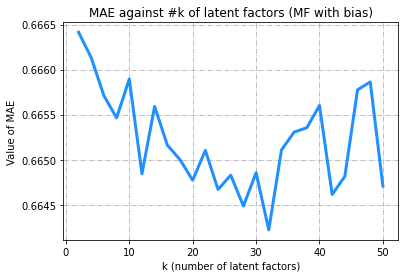

In [87]:
# MAE plot 
x = range(2,52,2)
plt.plot(x,mae,color='dodgerblue',linewidth=3)
plt.grid(True,linestyle='-.')
plt.xlabel('k (number of latent factors)')
plt.ylabel('Value of MAE')
plt.title('MAE against #k of latent factors (MF with bias)')

Text(0.5, 1.0, 'RMSE against #k of latent factors (MF with bias)')

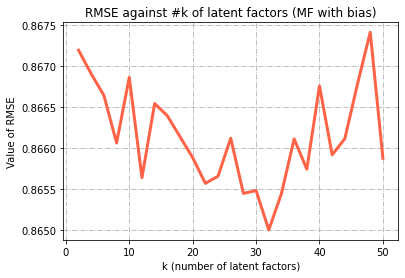

In [88]:
# RMSE Plot
plt.plot(x,rmse,color='tomato',linewidth=3)
plt.grid(True,linestyle='-.')
plt.xlabel('k (number of latent factors)')
plt.ylabel('Value of RMSE')
plt.title('RMSE against #k of latent factors (MF with bias)')

## Question 10:B

In [97]:
# Find the optimal k and min value
K_rmse = range(2,52,2)[rmse.index(min(rmse))]
K_mae = range(2,52,2)[mae.index(min(mae))]
min_rmse = min(rmse)
min_mae = min(mae)
print('The optimal k for RMSE is:',K_rmse)
print('The minimum average RMSE value is:',min_rmse)
print('The optimal k for MAE is:',K_mae)
print('The minimum average MAE value is:',min_mae)

The optimal k for RMSE is: 32
The minimum average RMSE value is: 0.8649991036150022
The optimal k for MAE is: 32
The minimum average MAE value is: 0.6642197646627767


In [37]:
genres_set = list(set(df_movies['genres']))
# print(genres_set)

genres_real = []
for i in range(len(genres_set)):
    c_genres = genres_set[i].split("|")
    for i in range(len(c_genres)):
        c_genres_real = c_genres[i]
        if c_genres_real not in genres_real:
            
            genres_real.append(c_genres_real)

print("Genres:{}".format(genres_real))
print('-'* 20)
print("Genres number:{}".format(len(genres_real)))

Genres:['Comedy', 'Crime', 'Mystery', 'Action', 'Drama', 'Horror', 'Thriller', 'Adventure', 'Children', 'Romance', 'Sci-Fi', 'Animation', 'War', 'Fantasy', 'IMAX', 'Musical', 'Western', 'Film-Noir', 'Documentary', '(no genres listed)']
--------------------
Genres number:20


## Question 10:C

In [38]:
# train the dataset using Popular movie trimming
from surprise.model_selection import KFold
from surprise import accuracy

In [39]:
def cal_rmse(Test_subset,data):
    kf = KFold(n_splits=10)
    rmse = []
    for k in range(2,52,2):
        svd = SVD(n_factors=k)
        rmse_i = []
        for trainset, testset in kf.split(data):

            # train and test algorithm.
            svd.fit(trainset)
            if Test_subset == "PMT":
                testset_trim = PMT(testset)
                predictions = svd.test(testset_trim)
            elif Test_subset == "UMT":
                testset_trim = UMT(testset)
                predictions = svd.test(testset_trim)
            else: # HVMT
                testset_trim = HVMT(testset)
                predictions = svd.test(testset_trim)

            # Compute and print Root Mean Squared Error
            rmse_i.append(accuracy.rmse(predictions, verbose=True))
        rmse.append(np.mean(rmse_i))
    return rmse

In [40]:
def plot_rmse(rmse,plot_title):
    x = range(2,52,2)
    plt.plot(x,rmse,color='dodgerblue',linewidth=3)
    plt.grid(True,linestyle='-.')
    plt.xlabel('k (number of latent factors)')
    plt.ylabel('Value of RMSE')
    plt.title('RMSE against k' + plot_title)
    print('The minimum average value of RMSE is:',min(rmse))

### Popular movie trimming dataset

In [41]:
rmse_PMT = cal_rmse("PMT",data)

RMSE: 0.8555
RMSE: 0.8575
RMSE: 0.8392
RMSE: 0.8573
RMSE: 0.8529
RMSE: 0.8421
RMSE: 0.8685
RMSE: 0.8436
RMSE: 0.8456
RMSE: 0.8507
RMSE: 0.8611
RMSE: 0.8474
RMSE: 0.8418
RMSE: 0.8468
RMSE: 0.8392
RMSE: 0.8385
RMSE: 0.8603
RMSE: 0.8558
RMSE: 0.8491
RMSE: 0.8452
RMSE: 0.8516
RMSE: 0.8649
RMSE: 0.8608
RMSE: 0.8455
RMSE: 0.8467
RMSE: 0.8408
RMSE: 0.8463
RMSE: 0.8475
RMSE: 0.8540
RMSE: 0.8488
RMSE: 0.8541
RMSE: 0.8459
RMSE: 0.8487
RMSE: 0.8553
RMSE: 0.8512
RMSE: 0.8442
RMSE: 0.8500
RMSE: 0.8547
RMSE: 0.8435
RMSE: 0.8488
RMSE: 0.8461
RMSE: 0.8449
RMSE: 0.8574
RMSE: 0.8391
RMSE: 0.8552
RMSE: 0.8487
RMSE: 0.8323
RMSE: 0.8630
RMSE: 0.8506
RMSE: 0.8419
RMSE: 0.8493
RMSE: 0.8462
RMSE: 0.8403
RMSE: 0.8457
RMSE: 0.8347
RMSE: 0.8463
RMSE: 0.8599
RMSE: 0.8449
RMSE: 0.8718
RMSE: 0.8511
RMSE: 0.8482
RMSE: 0.8514
RMSE: 0.8640
RMSE: 0.8399
RMSE: 0.8409
RMSE: 0.8560
RMSE: 0.8524
RMSE: 0.8496
RMSE: 0.8491
RMSE: 0.8429
RMSE: 0.8482
RMSE: 0.8364
RMSE: 0.8360
RMSE: 0.8421
RMSE: 0.8466
RMSE: 0.8532
RMSE: 0.8654

In [42]:
np.save("q10_rmse_PMT",rmse_PMT)

The minimum average value of RMSE is: 0.8455542687780675


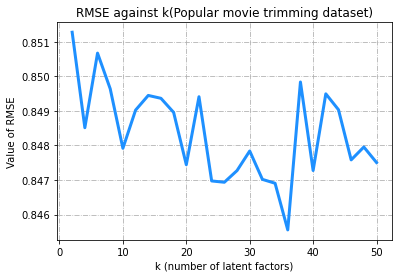

In [43]:
plot_rmse(rmse_PMT,"(Popular movie trimming dataset)")

### Unpopular movie trimming dataset

In [44]:
rmse_UMT = cal_rmse("UMT",data)

RMSE: 0.9223
RMSE: 0.9030
RMSE: 0.9046
RMSE: 0.9091
RMSE: 0.8986
RMSE: 0.8977
RMSE: 0.8955
RMSE: 0.8782
RMSE: 0.9085
RMSE: 0.9028
RMSE: 0.9191
RMSE: 0.9090
RMSE: 0.8797
RMSE: 0.9051
RMSE: 0.9199
RMSE: 0.8999
RMSE: 0.8889
RMSE: 0.8860
RMSE: 0.8935
RMSE: 0.9040
RMSE: 0.9014
RMSE: 0.9096
RMSE: 0.8979
RMSE: 0.8632
RMSE: 0.8964
RMSE: 0.8918
RMSE: 0.8894
RMSE: 0.9095
RMSE: 0.9190
RMSE: 0.9142
RMSE: 0.9146
RMSE: 0.9068
RMSE: 0.9038
RMSE: 0.9005
RMSE: 0.8889
RMSE: 0.8842
RMSE: 0.9044
RMSE: 0.9148
RMSE: 0.9075
RMSE: 0.9003
RMSE: 0.9205
RMSE: 0.9042
RMSE: 0.9078
RMSE: 0.9047
RMSE: 0.9059
RMSE: 0.9027
RMSE: 0.9032
RMSE: 0.8903
RMSE: 0.9019
RMSE: 0.8869
RMSE: 0.8922
RMSE: 0.8817
RMSE: 0.8927
RMSE: 0.8935
RMSE: 0.9062
RMSE: 0.8832
RMSE: 0.9082
RMSE: 0.9203
RMSE: 0.8968
RMSE: 0.9064
RMSE: 0.8795
RMSE: 0.8958
RMSE: 0.9257
RMSE: 0.8896
RMSE: 0.8985
RMSE: 0.9078
RMSE: 0.9068
RMSE: 0.8962
RMSE: 0.9216
RMSE: 0.9195
RMSE: 0.9281
RMSE: 0.9028
RMSE: 0.9025
RMSE: 0.8854
RMSE: 0.8972
RMSE: 0.8750
RMSE: 0.9237

In [45]:
np.save("q10_rmse_UMT",rmse_UMT)

The minimum average value of RMSE is: 0.898120483149996


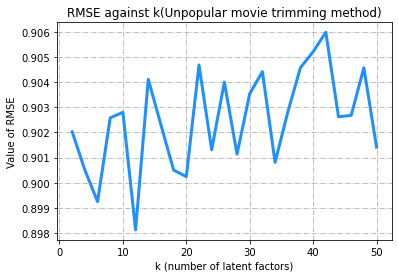

In [46]:
plot_rmse(rmse_UMT,"(Unpopular movie trimming method)")

### High variance movie trimming dataset

In [47]:
import os
file_path = os.path.expanduser('Synthetic_Movie_Lens/ratings_new.csv')
reader = Reader(line_format='user item rating timestamp', sep=',',skip_lines=1)
data_new = Dataset.load_from_file(file_path, reader=reader)

In [50]:
rmse_HVMT = cal_rmse("HVMT",data_new)

RMSE: 0.6925
RMSE: 0.7597
RMSE: 0.8253
RMSE: 0.7855
RMSE: 0.7588
RMSE: 0.7983
RMSE: 0.8569
RMSE: 0.5830
RMSE: 0.7657
RMSE: 0.8327
RMSE: 0.4974
RMSE: 0.7893
RMSE: 0.8579
RMSE: 0.6895
RMSE: 0.7429
RMSE: 0.8225
RMSE: 0.8376
RMSE: 0.8561
RMSE: 0.8949
RMSE: 0.8278
RMSE: 0.7964
RMSE: 0.9139
RMSE: 0.9548
RMSE: 0.7493
RMSE: 0.6853
RMSE: 0.7219
RMSE: 0.6978
RMSE: 0.7822
RMSE: 0.7376
RMSE: 0.6289
RMSE: 0.7102
RMSE: 0.7842
RMSE: 0.8605
RMSE: 0.8299
RMSE: 0.8201
RMSE: 0.7275
RMSE: 0.8286
RMSE: 0.7452
RMSE: 0.8028
RMSE: 0.7707
RMSE: 0.7338
RMSE: 0.7551
RMSE: 0.8950
RMSE: 0.7099
RMSE: 0.7590
RMSE: 0.5984
RMSE: 0.7127
RMSE: 0.7895
RMSE: 0.7935
RMSE: 0.8534
RMSE: 0.9068
RMSE: 0.7598
RMSE: 0.6756
RMSE: 0.8024
RMSE: 0.7556
RMSE: 0.7410
RMSE: 0.8199
RMSE: 0.8153
RMSE: 0.9116
RMSE: 0.7095
RMSE: 0.7790
RMSE: 0.7905
RMSE: 0.6192
RMSE: 0.6517
RMSE: 0.7698
RMSE: 0.7753
RMSE: 0.8756
RMSE: 0.7382
RMSE: 0.9290
RMSE: 0.8633
RMSE: 0.8327
RMSE: 0.9185
RMSE: 0.7195
RMSE: 0.6821
RMSE: 0.6935
RMSE: 0.6736
RMSE: 0.6867

In [51]:
np.save("q10_rmse_HVMT",rmse_HVMT)

The minimum average value of RMSE is: 0.7521811436833071


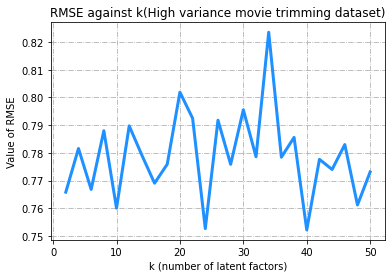

In [52]:
plot_rmse(rmse_HVMT,"(High variance movie trimming dataset)")

## Question 10: D

Plot the ROC curves for NMF-based collaborative filter

In [53]:
# define plot drawing
from sklearn import metrics
from surprise.model_selection import train_test_split
from sklearn.metrics import roc_curve

def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()

    roc_auc = metrics.auc(fpr,tpr)

    ax.plot(fpr, tpr, linewidth=3,color='deepskyblue',label= 'area under curve = %0.4f' % roc_auc)
    #color='coral'
    
    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)   

In [54]:
# Define a func to get ground_truth
def get_labels(predictions,threshold):
    #y_pred = list(map(lambda x:0 if x[3] < threshold else 1, predictions))
    #y_true = list(map(lambda x:0 if x[2] < threshold else 1, predictions))
    y_true, y_pred = [], []
    for u, i, r_real, r_pred, misc in predictions:
        y_true.append(threshold <= r_real)
        y_pred.append(r_pred)
    return y_pred, y_true

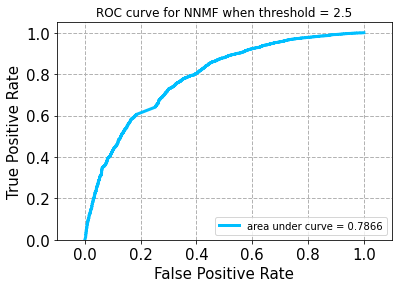

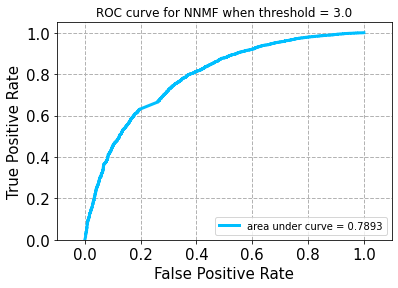

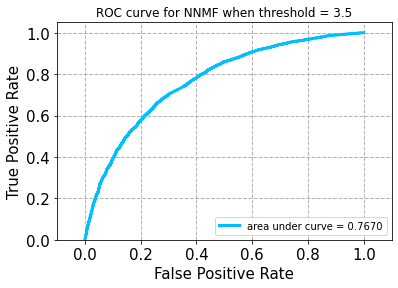

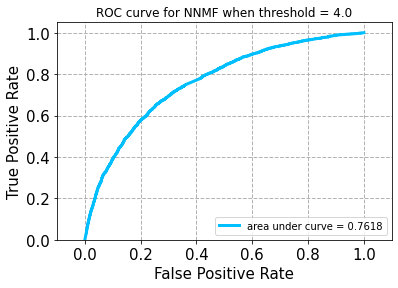

In [55]:
threshold = [2.5,3,3.5,4]
nmf = NMF(n_factors=20)
trainset, testset = train_test_split(data, test_size=.1)
predictions = nmf.fit(trainset).test(testset)
for thresh in threshold:
    y_pred, y_true = get_labels(predictions, thresh)
    fpr,tpr,_ = roc_curve(y_true, y_pred)
    plot_roc(fpr,tpr)
    plt.title('ROC curve for NNMF when threshold = %2.1f' % thresh)

## Question 11: Designing a Naive Collaborative Filter

In [56]:
from surprise import AlgoBase

class NaiveFilter(AlgoBase):
    def __init__(self):
        AlgoBase.__init__(self)
        
    def estimate(self, u, i):
        return np.mean([rating for (_, rating) in self.trainset.ur[u]])

In [57]:
naiveCF = NaiveFilter()
output = cross_validate(naiveCF, data, measures=['RMSE'], cv=10)
    
avg_rmse = np.mean(output['test_rmse'])
    
print("Avg RMSE: ", avg_rmse)

Avg RMSE:  0.9412426150480979


## Question 11: Performance on Test set subsets 


In [58]:
from surprise import accuracy

kf = KFold(n_splits=10)
def cal_avg_rmse(Test_subset,data):
    rmse_i = []
    for trainset, testset in kf.split(data):
        naiveCF = NaiveFilter()
        naiveCF.fit(trainset)
        if Test_subset == "PMT":
            testset_trim = PMT(testset)
        elif Test_subset == "UMT":
            testset_trim = UMT(testset)
        else: # HVMT
            testset_trim = HVMT(testset)
            
        predictions = naiveCF.test(testset_trim)

        rmse_i.append(accuracy.rmse(predictions, verbose=True))

    avg_rmse = np.mean(rmse_i)
    print("Avg RMSE:", avg_rmse)

### Popular test subsets

In [60]:
cal_avg_rmse("PMT",data)

RMSE: 0.9070
RMSE: 0.9363
RMSE: 0.9370
RMSE: 0.9549
RMSE: 0.9272
RMSE: 0.9307
RMSE: 0.9452
RMSE: 0.9261
RMSE: 0.9286
RMSE: 0.9191
Avg RMSE: 0.9312063941499369


### Unpopular test subsets

In [61]:
cal_avg_rmse("UMT",data)

RMSE: 0.9587
RMSE: 0.9487
RMSE: 0.9647
RMSE: 0.9696
RMSE: 0.9555
RMSE: 0.9643
RMSE: 0.9656
RMSE: 0.9654
RMSE: 0.9802
RMSE: 0.9613
Avg RMSE: 0.9634131366983443


In [64]:
cal_avg_rmse("HVMT",data)

RMSE: 1.0400
RMSE: 0.7060
RMSE: 0.7413
RMSE: 1.0490
RMSE: 0.9102
RMSE: 0.9491
RMSE: 0.8501
RMSE: 0.7191
RMSE: 0.7663
RMSE: 0.9375
Avg RMSE: 0.8668596555993855


## Question 12: Performance comparison

Computing the pearson similarity matrix...
Done computing similarity matrix.


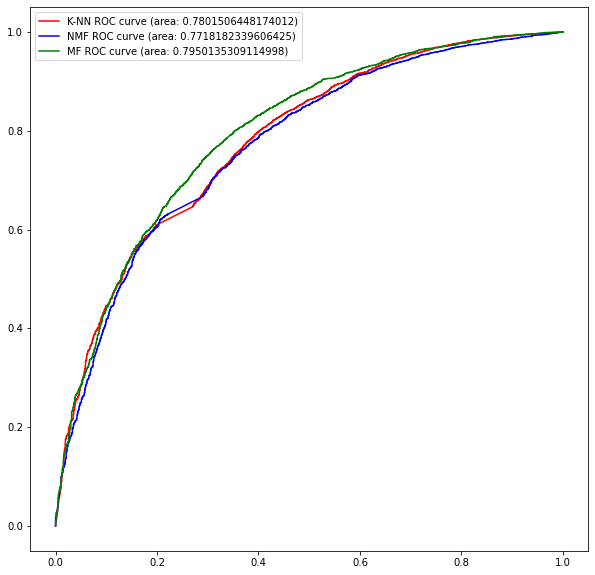

In [66]:
from surprise import NMF
from surprise import SVD
from sklearn import metrics
from surprise.model_selection import KFold

sim = {'name':'pearson','user_based':True}
thres = 3
kf = KFold(n_splits=10)
for train, test in kf.split(data):
    trainset, testset = train, test
    break

knn = KNNWithMeans(k=20, min_k=1, sim_options=sim, verbose=True)
knn.fit(trainset)
pred = knn.test(testset)

plt.figure(figsize=(10, 10))

y_pred, y_true = get_labels(pred, thres)
x, y, _ = metrics.roc_curve(y_true=y_true, y_score=y_pred, pos_label=1)
plt.plot(x, y, color='red')

knn_area = metrics.roc_auc_score(y_true=y_true, y_score=y_pred)
# =========================================
nmf = NMF(n_factors=20)
nmf.fit(trainset)
pred = nmf.test(testset)

y_pred, y_true = get_labels(pred, thres)
x, y, _ = metrics.roc_curve(y_true=y_true, y_score=y_pred, pos_label=1)
plt.plot(x, y, color='blue')

nmf_area = metrics.roc_auc_score(y_true=y_true, y_score=y_pred)
# ============================================
svd = SVD(n_factors=30)
svd.fit(trainset)
pred = svd.test(testset)

y_pred, y_true = get_labels(pred, thres)
x, y, _ = metrics.roc_curve(y_true=y_true, y_score=y_pred, pos_label=1)

mf_area = metrics.roc_auc_score(y_true=y_true, y_score=y_pred)

plt.plot(x, y, color='green')
# =============================================================
plt.legend(labels = ['K-NN ROC curve (area: ' + str(knn_area) + ')', 
                     'NMF ROC curve (area: ' + str(nmf_area) + ')', 
                     'MF ROC curve (area: ' + str(mf_area) + ')'])

## Question 13: Understanding Precision and Recall in the context of Recommender Systems:

The answer to this question is in the report.

## Question 14: Comparing the precision-recall metrics for the different models


In [67]:
def precision_recall_at_k(predictions, k=10, threshold=3):
    '''Return precision and recall at k metrics for each user.'''

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    quality = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1
        
        # Is the user qualified for calculating
       # quality[uid] = 1 if n_rel>0 and len(user_ratings)>=k else 0
       # precisions[uid] = precisions[uid] if n_rel>0 and len(user_ratings)>=k else 0
       # recalls[uid] = recalls[uid] if n_rel>0 and len(user_ratings)>=k else 0

    return precisions, recalls#, quality

In [70]:
from collections import defaultdict


def get_pre_rec(algorithm,data):
    kf = KFold(n_splits=10)
    avg_precisions = []
    avg_recalls = []

    for i in range(1, 26):
        if algorithm == "knn":
            algo = KNNWithMeans(k=20, min_k=1, sim_options=sim, verbose=False)
        elif algorithm == "nmf":
            algo = NMF(n_factors=20)
        else: # mf
            algo = SVD(n_factors=30)

        temp_precision = list()
        temp_recall = list()
        for trainset, testset in kf.split(data):
            algo.fit(trainset)
            predictions = algo.test(testset)
            precisions, recalls = precision_recall_at_k(predictions, k=i)
           # precisions, recalls, quality = precision_recall_at_k(predictions, k=i)

            # Precision and recall can then be averaged over all users
            temp_precision.append(sum(prec for prec in precisions.values()) / len(precisions))
            temp_recall.append(sum(rec for rec in recalls.values()) / len(recalls))

        avg_precisions.append(sum(temp_precision) / len(temp_precision))
        avg_recalls.append(sum(temp_recall) / len(temp_recall))
    return avg_precisions,avg_recalls

In [71]:
import itertools

def plot_3figures(avg_precisions,avg_recalls):
    plt.figure(figsize=(10, 10))

    plt.subplot(3,1,1)
    plt.title("Average Precision vs. t")
    plt.ylabel("Average Precision")
    plt.xlabel("t")
    plt.plot([i for i in range(1, 26)], avg_precisions,linewidth=3,color='deepskyblue')

    plt.figure(figsize=(10, 10))

    plt.subplot(3,1,2)
    plt.title("Average Recalls vs. t")
    plt.ylabel("Average Recalls")
    plt.xlabel("t")
    plt.plot([i for i in range(1, 26)], avg_recalls,linewidth=3,color='tomato')

    plot_list=zip(*sorted(zip(*(avg_recalls, avg_precisions))))

    plt.figure(figsize=(10, 10))

    plt.subplot(3,1,3)
    plt.title("Average Precision vs. Average Recall")
    plt.ylabel("Average Precision")
    plt.xlabel("Average Recall")
    plt.plot(*plot_list,linewidth=3,color='gold')

    #knn_precision = avg_precisions
    #knn_recall = avg_recalls
    # return avg_precision,avg_recalls

### k-NN


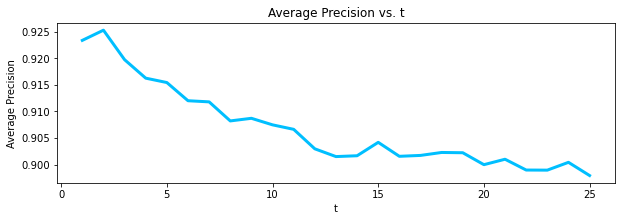

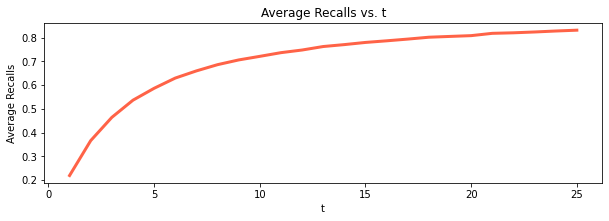

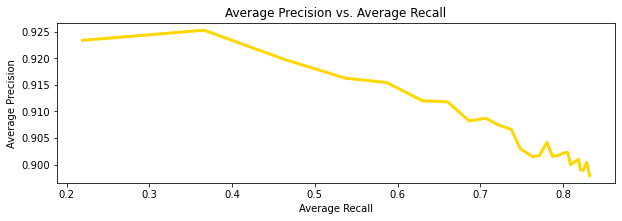

In [72]:
algorithm = "knn"
knn_precision,knn_recall = get_pre_rec(algorithm,data)
plot_3figures(knn_precision,knn_recall)

### NMF

In [74]:
algorithm = "nmf"
nmf_precision,nmf_recall = get_pre_rec(algorithm,data)

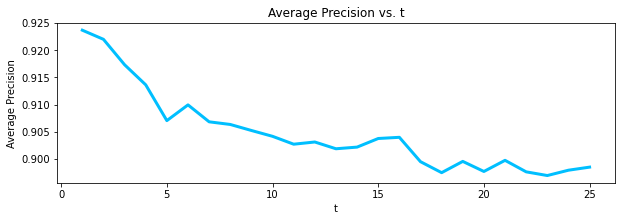

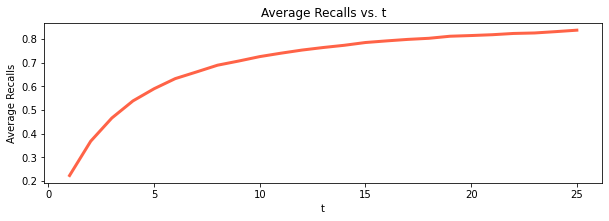

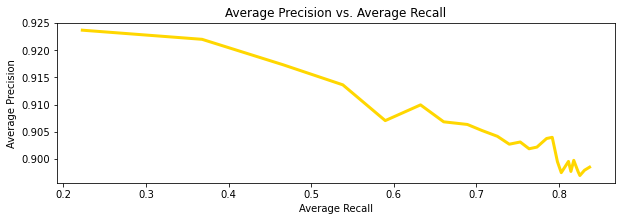

In [75]:
plot_3figures(nmf_precision,nmf_recall)

### MF

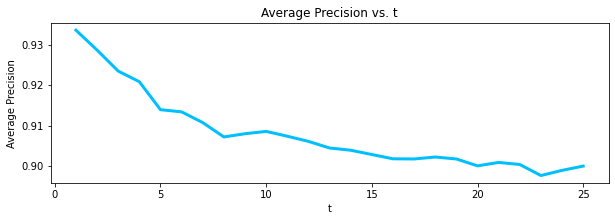

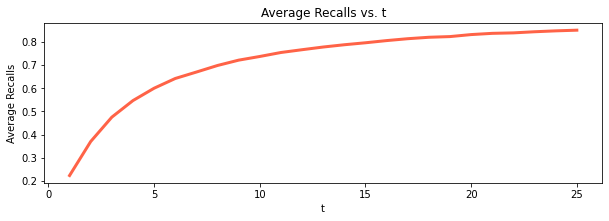

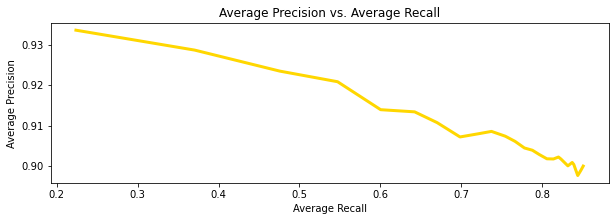

In [76]:
algorithm = "mf"
mf_precision,mf_recall = get_pre_rec(algorithm,data)
plot_3figures(mf_precision,mf_recall)

### Plot precision-recall curves

Text(0.5, 1.0, 'Precision-Recall')

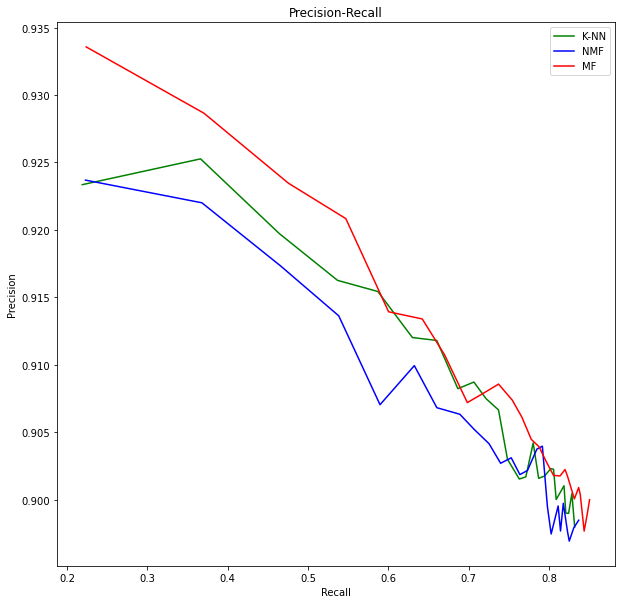

In [77]:
plt.figure(figsize=(10, 10))

plot_list=zip(*sorted(zip(*(knn_recall, knn_precision))))
plt.plot(*plot_list, color='green')

plot_list=zip(*sorted(zip(*(nmf_recall, nmf_precision))))
plt.plot(*plot_list, color='blue')

plot_list=zip(*sorted(zip(*(mf_recall, mf_precision))))
plt.plot(*plot_list, color='red')

plt.legend(labels = ['K-NN', 'NMF','MF'])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall')